In [1]:
import sys
sys.path.insert(1, '/home/maria/Documents/MyPythonLibrary/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob

In [2]:
plotsDir='/home/maria/Documents/BC3/ClimAnalogsHMA/Plots/'
sourceData1='/home/maria/Documents/Data/NOAAV2c/'
#!ls /home/maria/Documents/Data/ERA5/

In [3]:
#model1='noaaV2c-eraint'
#filename1 = 'prmsl_only.mon.mean.noaaV2c-eraint_185101-201812_2.0x2.0.nc'
model1='noaaV2c-era5'
filename1='prmsl.mon.mean.noaaV2c-era5_MA_185101-201812_2.0x2.0.nc'
variable='prmsl'
ds1 = xr.open_dataset(sourceData1+filename1)[variable]
print(ds1.units)
ds1=ds1/100

Pa


In [4]:
domain='MA'
iyr=1979
fyr=2018
field1=dom.field_dom(ds1,domain)
field1=field1.sel(time=slice(str(iyr)+"-"+str(1), str(fyr)+"-"+str(12)))

In [5]:
climatology = field1.groupby("time.month").mean("time")
anomalies = field1.groupby("time.month") - climatology

In [6]:
climatology[0].shape

(24, 44)

In [7]:
models=np.arange(1,13,1)

Text(0.5, 0.98, 'Calendar climatology MA noaaV2c-era5 1979-2018')

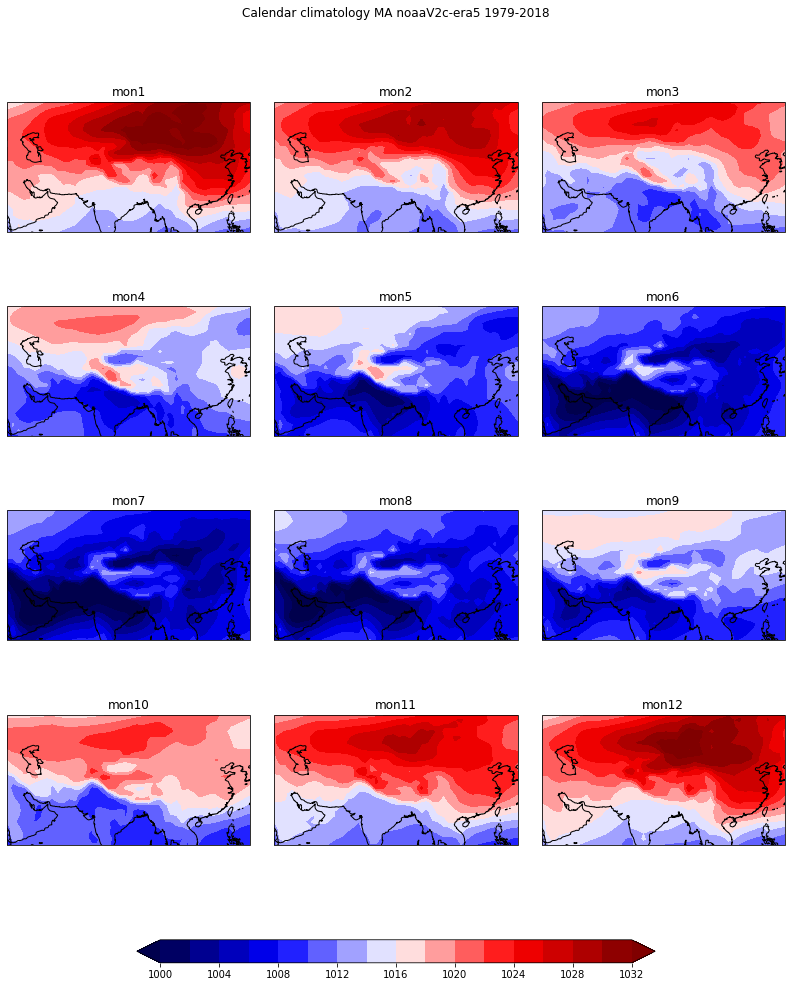

In [8]:
nrows=4
ncols=3
# Define the contour levels to use in plt.contourf
clevs=np.arange(1000,1034,2)
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(12,16))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for i,model in enumerate(models):

        # Select the week 1 forecast from the specified model
        data=climatology[i]
        lons, lats = np.meshgrid(data.coords[data.dims[1]].values, data.coords[data.dims[0]].values)

        # Contour plot
        cs=axs[i].contourf(lons,lats,data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='seismic',extend='both')

        # Title each subplot with the name of the model
        axs[i].set_title('mon'+str(model))

        # Draw the coastines for each subplot
        axs[i].coastlines()

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')

# Add a big title at the top
plt.suptitle('Calendar climatology %s %s %i-%i'%(domain,model1,iyr,fyr))

In [9]:
calendar_trendList=[]
calendar_pvalueList=[]
for rmon in np.arange(1,13,1):
    vals,anoms=climb.monthly_selection(field1,rmon)
    s,i,r,p,st=climb.trend_vect(np.arange(0,anoms.shape[0],1),anoms,'time')
    calendar_trendList.append(s)
    calendar_pvalueList.append(p)

trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


spatialtrend_prmsl_noaaV2c-era5_calendar_historical_MA_1979-2018


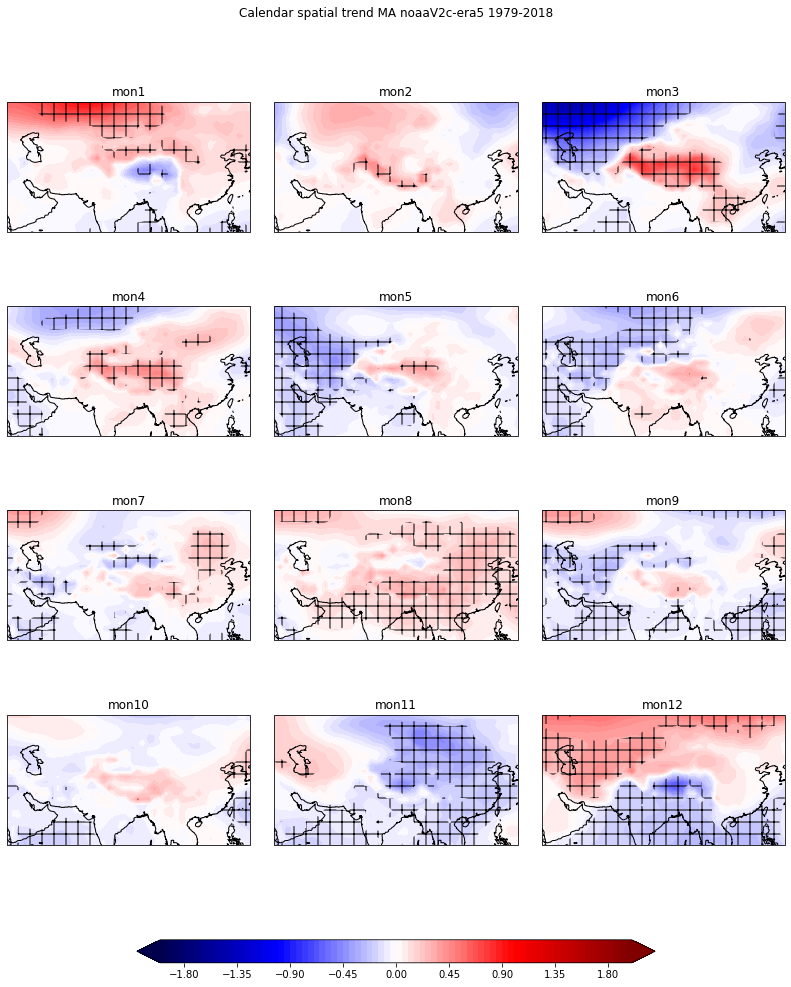

In [10]:
nrows=4
ncols=3
# Define the contour levels to use in plt.contourf
#unit,clevs,color=myplot.get_format(variable)
unit='hPa'
clevs=np.arange(-2,2.05,0.05)
color='seismic'


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(12,16))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for i,model in enumerate(models):

        # Select the week 1 forecast from the specified model
        data=calendar_trendList[i]
        data0=calendar_pvalueList[i]
        lons, lats = np.meshgrid(data.coords[data.dims[1]].values, data.coords[data.dims[0]].values)

        # Contour plot
        cs=axs[i].contourf(lons,lats,10*data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap=color,extend='both')
        levels=[0,0.1,1.0]
        cs0 = axs[i].contourf(lons,lats,data0, transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)

        # Title each subplot with the name of the model
        axs[i].set_title('mon'+str(model))

        # Draw the coastines for each subplot
        axs[i].coastlines()

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')

# Add a big title at the top
plt.suptitle('Calendar spatial trend %s %s %i-%i'%(domain,model1,iyr,fyr))
plotname='spatialtrend_'+variable+'_'+model1+'_calendar_historical_'+domain+'_'+str(iyr)+'-'+str(fyr)
print(plotname)
plt.savefig(plotsDir+plotname+'.png',format='png')
plt.show()

In [11]:
calendar_ts=[]
for rmon in np.arange(1,13,1):
    vals,anoms=climb.monthly_selection(field1,rmon)
    ts=climb.spatial_average(anoms)
    calendar_ts.append(ts)

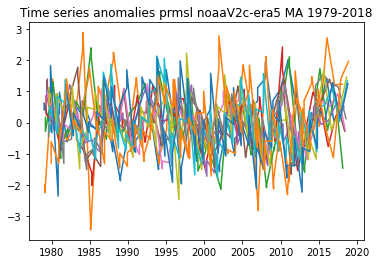

In [12]:
for elem in calendar_ts:
    plt.plot(elem.time,elem)
plt.title("Time series anomalies %s %s %s %i-%i"%(variable,model1,domain,iyr,fyr))
plotname2='timeseries_'+variable+'_'+model1+'_calendar_historical_'+domain+'_'+str(iyr)+'-'+str(fyr)
plt.savefig(plotsDir+plotname2+'.png',format='png')
plt.show()

In [20]:
season='DJFMA'
period=str(iyr)+'-'+str(fyr)
print(period,season)
vals1,anoms1=climb.seasonal_selection(field1,season,6,iyr,6,fyr)
par1=climb.trend_vect(anoms1.time,anoms1,'time')

1979-2018 DJFMA
39
5


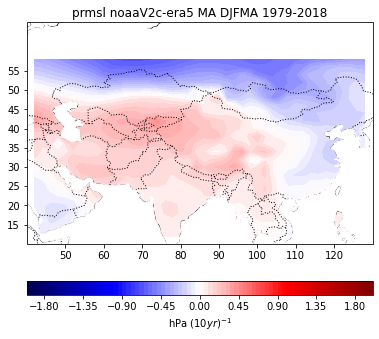

In [19]:
#unit,clevs,color=myplot.get_format(variable)
unit='hPa'
clevs=np.arange(-2,2.05,0.05)
color='seismic'

subdomain='MA'
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(subdomain)

fig,axs= plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(8,10))
lons, lats = np.meshgrid(anoms1.lon,anoms1.lat)
CS1=axs.contourf(lons,lats, 10*par1[0][:,:],clevs,
                transform=ccrs.PlateCarree(),
                cmap=color,extent='both')
levels=[0,0.1,1.0]
cs = axs.contourf(lons,lats,par1[3][:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)

# Draw the coastines for each subplot
axs.coastlines()
axs.add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
axs.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='white'))
axs.set_extent([lonW, lonE, latS,latN])
        # Longitude and latitude labels
axs.set_xticks(np.arange(lonW+10,lonE,10), crs=ccrs.PlateCarree())
axs.set_yticks(np.arange(latS+5,latN,5), crs=ccrs.PlateCarree())

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.35, top=0.7, left=0.20, right=0.80,
                    wspace=0.05, hspace=0.5)
# Add a colorbar axis at the bottom of the graph
#([xmin,ymin,dx,dy])
cbar_ax = fig.add_axes([0.2, 0.3, 0.6, 0.02])
# Draw the colorbar
cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s $(10yr)^{-1}$'%(unit))
# Add a big title at the top
plotname='spatialtrend_'+variable+'_'+model1+'_'+season+'_historical_'+domain+'_'+period
plt.suptitle('%s %s %s %s %s'%(variable,model1,domain,season,period),y=0.70)
plt.savefig(plotsDir+plotname+'.png',format='png')

plt.show()